La regresion logistica es una herramienta que basandose en informacion que le damos aprende a distinguir entre dos opciones como un si o un no, entonces la regresion logistica no se usa para predecir valores o categorias, si no para predecir que tan probable es que algo sea si o no.

En este ejemplo tenemos un DataFrame de clientes que han comprado o no un seguro en nuestra compañía, así que queremos desarrollar un modelo que prediga si un cliente nuevo va comprar o no nuestro seguro basándonos en la información de los clientes que ya tenemos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
ruta = 'datos_seguro.csv'

df = pd.read_csv(ruta)
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


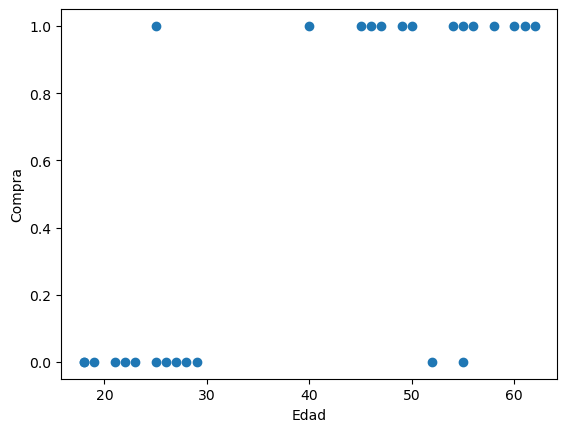

In [6]:
plt.scatter(df.edad, df.compra)
plt.xlabel('Edad')
plt.ylabel('Compra');

In [30]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], train_size=0.9,random_state=42)

In [22]:
X_entrena

,edad
9,61
14,49
13,29
16,25
23,45
10,18
25,54
12,27
24,50
3,52


In [23]:
X_prueba

,edad
20,21
19,18
22,40


In [24]:
modelo = LogisticRegression()

In [25]:
modelo.fit(X_entrena, y_entrena)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
modelo.score(X_entrena, y_entrena)

0.875

In [27]:
datos_nuevos = pd.DataFrame({'edad': [25, 35, 45, 55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [28]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.87125152, 0.12874848],
       [0.64749177, 0.35250823],
       [0.3326984 , 0.6673016 ],
       [0.11919835, 0.88080165]])

In [29]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.12874848, 0.35250823, 0.6673016 , 0.88080165])

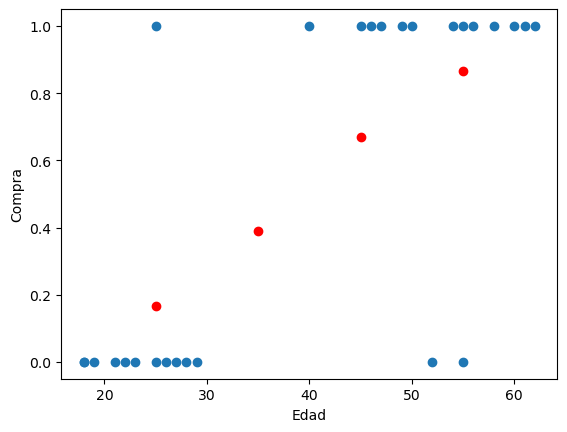

In [20]:
plt.scatter(df.edad, df.compra)
plt.scatter(datos_nuevos['edad'], prob_compra, color='red')
plt.xlabel('Edad')
plt.ylabel('Compra');